In [1]:
import re, pprint, string, nltk, os, random, logging, sys, math
# Change working directory to the Folder that has all the Survey files
working_directory = 'C:\\Users\\khanh\\Desktop\\GMUeducation\\AIT526\\TEAM\\FINAL\\RM Survey Results\\'
os.chdir(working_directory)
from os import chdir, getcwd
from nltk.probability import ConditionalProbDist, ELEProbDist
from nltk.probability import ConditionalFreqDist
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request
import heapq
from itertools import islice
from nltk import ngrams
from collections import Counter
from pprint import pprint
from collections import defaultdict
from string import punctuation
from heapq import nlargest
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
#pio.renderers.default = 'svg'
pio.renderers.default = 'browser'
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

### Retrieve and Merge all the RM Survey Results

In [2]:
# Retrieve and Merge all the RM Survey Results into 1 big dataframe

df100 = pd.read_csv('Spring 2022 RM Survey Results 100.csv')
# df101 = pd.read_csv('Spring 2022 RM Survey Results 101.csv')
df101 = pd.read_csv('Spring 2022 RM Survey Results 101.csv', encoding='latin1')
df102 = pd.read_csv('Spring 2022 RM Survey Results 102.csv')
df103 = pd.read_csv('Spring 2022 RM Survey Results 103.csv')
df = pd.concat([df100, df101, df102, df103])
df.shape

(124, 26)

In [3]:
df.dtypes

If you agree with the consent above, please select I Agree below and continue with the survey. Otherwise, close the survey.            object
Course Number                                                                                                                           int64
Course  Section                                                                                                                         int64
Class format                                                                                                                           object
Program of study                                                                                                                       object
Residency                                                                                                                              object
BS field of study                                                                                                                      object
Proble

In [4]:
#The describe() function provide the statistical summary such as: count, average, min, max... for the Survey data with columns in numeric type 
df.describe()

Course Number  Course  Section   \
count     124.000000        124.000000   
mean      100.854839          4.427419   
std         0.813439          2.285242   
min       100.000000          1.000000   
25%       100.000000          2.750000   
50%       101.000000          5.000000   
75%       101.000000          6.000000   
max       103.000000          9.000000   

       Problems (topics in research modules) increased my interest in course issues.  \
count                                         124.000000                               
mean                                            4.314516                               
std                                             0.895943                               
min                                             1.000000                               
25%                                             4.000000                               
50%                                             4.500000                               
75%                                             5.000000                               
max                                             5.000000                               

       Research modules activities enhanced my curiosity.  \
count                                         124.000000    
mean                                            4.266129    
std                                             0.955165    
min                                             1.000000    
25%                                             4.000000    
50%                                             4.500000    
75%                                             5.000000    
max                                             5.000000    

       I felt motivated to explore course content related questions.  \
count                                         124.000000               
mean                                            4.379032               
std                                             0.841917               
min                                             1.000000               
25%                                             4.000000               
50%                                             5.000000               
75%                                             5.000000               
max                                             5.000000               

       I utilized a variety of provided information sources to explore the topics in research modules.  \
count                                         124.000000                                                 
mean                                            4.427419                                                 
std                                             0.857045                                                 
min                                             1.000000                                                 
25%                                             4.000000                                                 
50%                                             5.000000                                                 
75%                                             5.000000                                                 
max                                             5.000000                                                 

       I utilized a variety of additional information sources to explore the selected research topic.  \
count                                         124.000000                                                
mean                                            4.379032                                                
std                                             0.942171                                                
min                                             1.000000                                                
25%                                             4.000000                                                
50%                                             5.0

In [5]:
#Get the dimension of the dataframe: number of rows and columns
print("Number of Rows and Columns: ", df.shape)

Number of Rows and Columns:  (124, 26)


In [6]:
#Check to see any NULL value in the dataframe
df.isnull().sum()

If you agree with the consent above, please select I Agree below and continue with the survey. Otherwise, close the survey.            0
Course Number                                                                                                                          0
Course  Section                                                                                                                        0
Class format                                                                                                                           0
Program of study                                                                                                                       0
Residency                                                                                                                              0
BS field of study                                                                                                                      0
Problems (topics in research modules) inc

In [7]:
df.head()

If you agree with the consent above, please select I Agree below and continue with the survey. Otherwise, close the survey.  \
0                                            I Agree                                                                            
1                                            I Agree                                                                            
2                                            I Agree                                                                            
3                                            I Agree                                                                            
4                                            I Agree                                                                            

   Course Number  Course  Section  Class format Program of study  \
0            100                 3       Online             MS 1   
1            100                 3       Online             MS 1   
2            100                 1       Hybrid            PhD 1   
3            100                 1       Online             MS 2   
4            100                 1    In person             MS 1   

       Residency                                  BS field of study  \
0       Domestic  Other STEM (Science, Technology, Engineering, ...   
1       Domestic                                                 IT   
2  International                                    Non-STEM majors   
3  International                                                 CS   
4  International                                    Non-STEM majors   

   Problems (topics in research modules) increased my interest in course issues.  \
0                                                  5                               
1                                                  3                               
2                                                  4                               
3                                                  5                               
4                                                  5                               

   Research modules activities enhanced my curiosity.  \
0                                                  4    
1                                                  4    
2                                                  3    
3                                                  5    
4                                                  5    

   I felt motivated to explore course content related questions.  \
0                                                  4               
1                                                  4               
2                                                  4               
3                                                  5               
4                                                  5               

   I utilized a variety of provided information sources to explore the topics in research modules.  \
0                                                  5                                                 
1                                                  3                                                 
2                                                  4                                                 
3                                                  4                                                 
4                                                  5                                                 

   I utilized a variety of additional information sources to explore the selected research topic.  \
0                                                  5                                                
1                                                  3                                                
2                                                  3                                                
3                                                  5                                                
4               

#### CREATE PIE GRAPHS FOR CATEGORICAL DATA TYPE INCLUDING PERCENTAGE

In [8]:
#See the Distribution of each Class Format of students who responded to the survey
temp_series = df['Class format'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Class fomat distribution according to the GMU Student Survey'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Class_format")

In [9]:
#See the Distribution of Student Residency for those who responded to the survey
temp_series = df['Residency'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Residency of GMU Student distribution according to the Survey'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Residency")

In [10]:
#See the Distribution of Student Program of Study for those who responded to the survey
temp_series = df['Program of study'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Grad student Program of Study distribution according to the GMU Student Survey'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Program_Study")

In [11]:
#See the Distribution of Student Field of Study for those who responded to the survey
temp_series = df['BS field of study'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Grad Student Field of Study distribution according to the GMU Student Survey'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BS_fied_of_Study")

#### Aggregate value of rating answer for survey question and display in bubbles scattered plot

   Count Rating
5     62      5
4     49      4
3      6      3
2      4      2
1      3      1


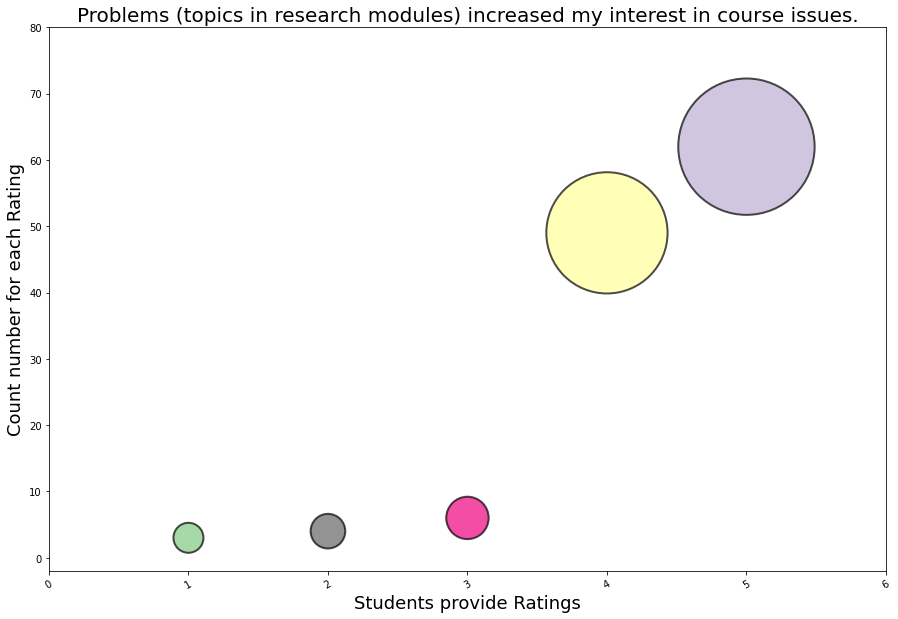

In [12]:
df5 = pd.DataFrame()
df1 = pd.DataFrame()

df5['Rating'] = df['Problems (topics in research modules) increased my interest in course issues.']
df1['Count'] = df5['Rating'].value_counts()
Rating = [5,4,3,2,1]
df1['Rating'] = Rating
df1['Rating'] = pd.Categorical(df1['Rating'])

print(df1)

# colors_list=np.random.rand(5)
colors_list = [0.2,.4,.6, .8, .1]
plt.figure(figsize=(15,10))

# Scatterplot
#ax = plt.gca()
ax = plt.scatter(
    x = df1['Rating'], 
    y = df1['Count'], 
    #plt.scatter(x,y,s=sizes*500,c=colors_list)
    s= df1['Count']*300, 
    c = colors_list,
    cmap="Accent", 
    alpha=0.7, 
    edgecolors="black", 
    linewidth=2);


# Add titles (main and on axis)
#plt.yscale('log')
plt.yscale('linear')
plt.xlabel("Students provide Ratings", size = 18)
plt.ylabel("Count number for each Rating", size = 18)
plt.title("Problems (topics in research modules) increased my interest in course issues.", size = 20)
plt.ylim(-2,80)
plt.xlim(0, 6)
plt.xticks(rotation=30)

plt.show()

#### CREATE BAR GRAPHS FOR THE COLUMNS WHICH HAVE ANSWERS WITH RANKING ORDINAL DATA TYPE INCLUDING COUNT AND PERCENTAGE

In [13]:
def add_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height() + 0.2
        ax.annotate(percentage, (x, y), size = 12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



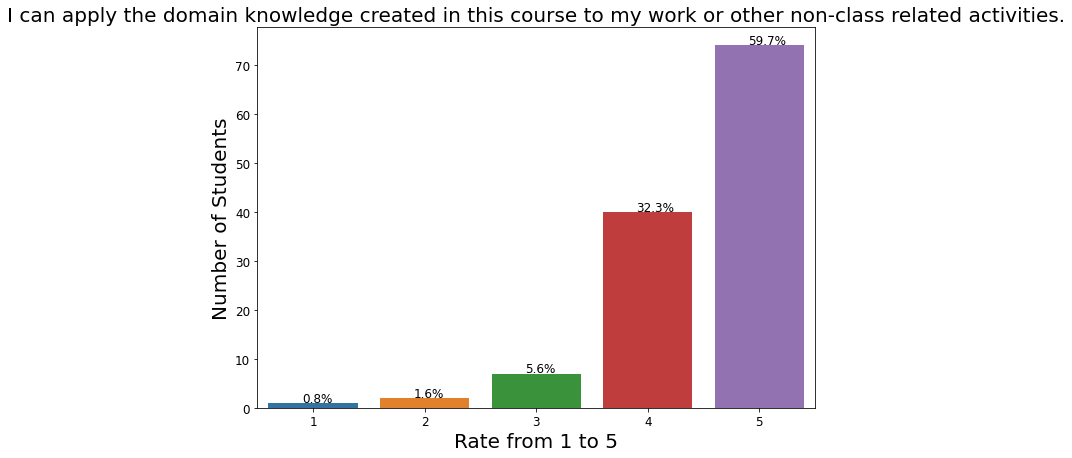

In [14]:
df3 = df['I can apply the domain knowledge created in this course to my work or other non-class related activities.']
plt.figure(figsize=(10, 7))
ax = sns.countplot(df3)
plt.xticks(size = 12)
plt.title('I can apply the domain knowledge created in this course to my work or other non-class related activities.', size=20)
plt.xlabel('Rate from 1 to 5', size=20)
plt.yticks(size = 12)
plt.ylabel('Number of Students', size=20)
add_percentage(ax, df3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



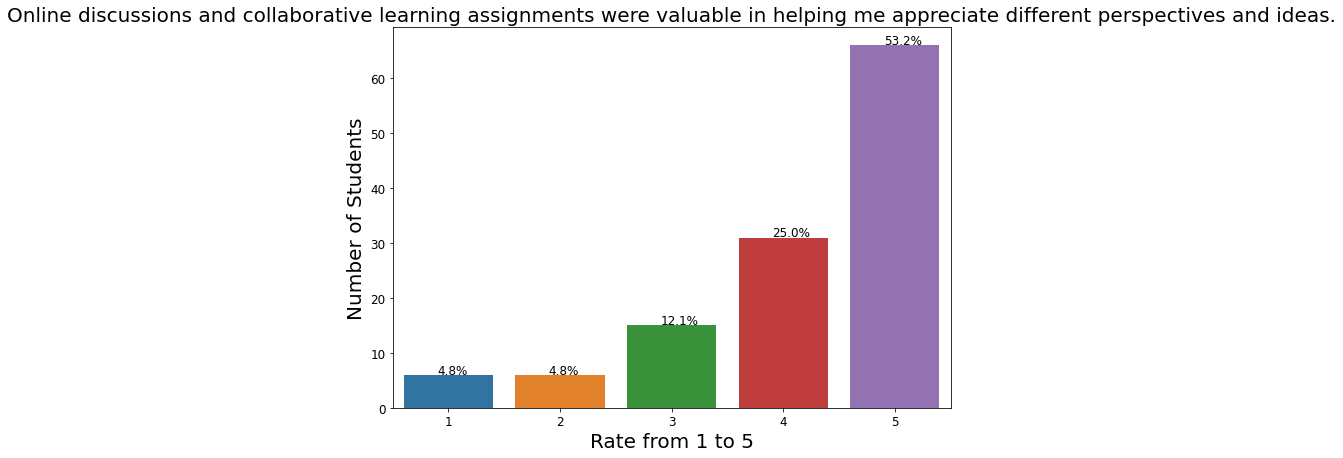

In [15]:
df3 = df['Online discussions and collaborative learning assignments were valuable in helping me appreciate different perspectives and ideas.']
plt.figure(figsize=(10, 7))
ax = sns.countplot(df3)
plt.xticks(size = 12)
plt.title('Online discussions and collaborative learning assignments were valuable in helping me appreciate different perspectives and ideas.', size=20)
plt.xlabel('Rate from 1 to 5', size=20)
plt.yticks(size = 12)
plt.ylabel('Number of Students', size=20)
add_percentage(ax, df3)

### Retrieve last 3 columns for the Answers in unstructured data type, text format, to analyze the Student's responses

In [16]:
data_frame = pd.DataFrame(df)
df_text = data_frame.iloc[:,[23, 24, 25]]
df_text.head(10)

Provide up to 3 things that you want to keep (loved) about the  research  modules and why.  \
0  The structure of the research modules was very...                                           
1  I liked that we had to do more of a dive into ...                                           
2                                                NaN                                           
3  1)Got to learn new technologies\n2)Learned how...                                           
4  Inspire new idea\nlet other people see my thou...                                           
5  I like the way we interacted with other studen...                                           
6  R1 offered an opportunity to identify a big da...                                           
7  I enjoyed the literature review activity, whic...                                           
8                                                NaN                                           
9                                                NaN                                           

  Provide up to 3 things that you disliked about  the research modules and why.  \
0  I think the requirement for the implementation...                              
1  I would only want to keep research modules if ...                              
2                                                NaN                              
3                                  I don't have any                               
4  No, I don't any dislike about the research mod...                              
5  The research modules are less and mostly are o...                              
6  Because the course was fully online as a resul...                              
7                                                NaN                              
8  Better to experience an actual research. Writi...                              
9                                                NaN                              

  Provide up to 3 things that you suggest to  be  added to the research  modules and why.  
0  It would be nice to have more examples of what...                                       
1  This type of assignment should replace some of...                                       
2                                                NaN                                       
3  This research assignment is good. So, their is...                                       
4  I would suggest add more specific question for...                                       
5  The modules can be increased in number which c...                                       
6  Make R1-R3 an mini-individual project.  There ...                                       
7                                                NaN                                       
8                                                NaN                                       
9                                                NaN

#### Analyze the Answer for question: 'Provide up to 3 things that you want to keep (loved) about the  research  modules and why?'

In [17]:
text_col1 = df_text['Provide up to 3 things that you want to keep (loved) about the  research  modules and why.'].values.tolist()
print(text_col1)

['The structure of the research modules was very helpful in understanding how to set up and build a research project, and the development from one module to the next was very good in mimicking how this process would be handled in the real world.', 'I liked that we had to do more of a dive into obscure topics.', nan, "1)Got to learn new technologies\n2)Learned how to perform Research analysis\n3)Get to know other people's perspective", "Inspire new idea\nlet other people see my thought, and give me suggestion, which is good.\nI can understand other people's thought", 'I like the way we interacted with other students like sharing thoughts, accepting suggestions and reading each others work.', 'R1 offered an opportunity to identify a big data topic that I was interested in although I realized that I might not be able to fully complete it.  R2 and R3 refinement of the initial hypothesis was helpful', 'I enjoyed the literature review activity, which helped me develop research questions.', n

In [18]:
# Join, tokenize and process the text to data mining the Answers for some context
string_col1 = ' '.join([str(n) for n in text_col1])
tokens = word_tokenize(string_col1)
type(tokens)
# print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens))
print("First 20 words: \n", tokens[0:20], "\n")
#Remove punctuations
toker = nltk.RegexpTokenizer(r"\w+")
no_punct = toker.tokenize(string_col1)
print("Number of words after punctuation remove: ", len(no_punct))
print(no_punct[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist = FreqDist(word.lower() for word in no_punct if word.lower() not in stopwords.words('english'))
print(freq_dist, '\n')

#OR 
filtered_words = [word.lower() for word in no_punct if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words))
print(filtered_words[0:20])

Number of words after word tokenizing:  1647
First 20 words: 
 ['The', 'structure', 'of', 'the', 'research', 'modules', 'was', 'very', 'helpful', 'in', 'understanding', 'how', 'to', 'set', 'up', 'and', 'build', 'a', 'research', 'project'] 

Number of words after punctuation remove:  1501
['The', 'structure', 'of', 'the', 'research', 'modules', 'was', 'very', 'helpful', 'in', 'understanding', 'how', 'to', 'set', 'up', 'and', 'build', 'a', 'research', 'project'] 

<FreqDist with 369 samples and 873 outcomes> 

Number of words without stop words:  873
['structure', 'research', 'modules', 'helpful', 'understanding', 'set', 'build', 'research', 'project', 'development', 'one', 'module', 'next', 'good', 'mimicking', 'process', 'would', 'handled', 'real', 'world']


In [19]:
#Lemmatize the cleaned words and count the distinct lemmatized words.
lemma = nltk.WordNetLemmatizer()
word_lemmatized = [lemma.lemmatize(t) for t in filtered_words]
print(FreqDist(word_lemmatized))

<FreqDist with 344 samples and 873 outcomes>


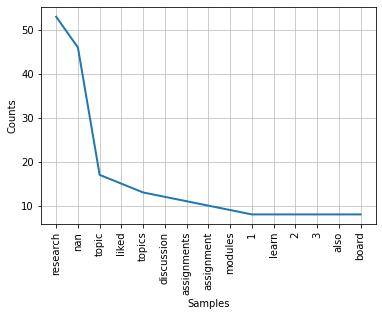

[('research', 53),
 ('nan', 46),
 ('topic', 17),
 ('liked', 15),
 ('topics', 13),
 ('discussion', 12),
 ('assignments', 11),
 ('assignment', 10),
 ('modules', 9),
 ('1', 8),
 ('learn', 8),
 ('2', 8),
 ('3', 8),
 ('also', 8),
 ('board', 8)]

In [20]:
# Calculate the word distribution and plot and list only top 15 words
# The most occurred words reveal the concencus for the question: 
#'Provide up to 3 things that you want to keep (loved) about the  research  modules and why.'

freq_dist.plot(15)
freq_dist.most_common(15)

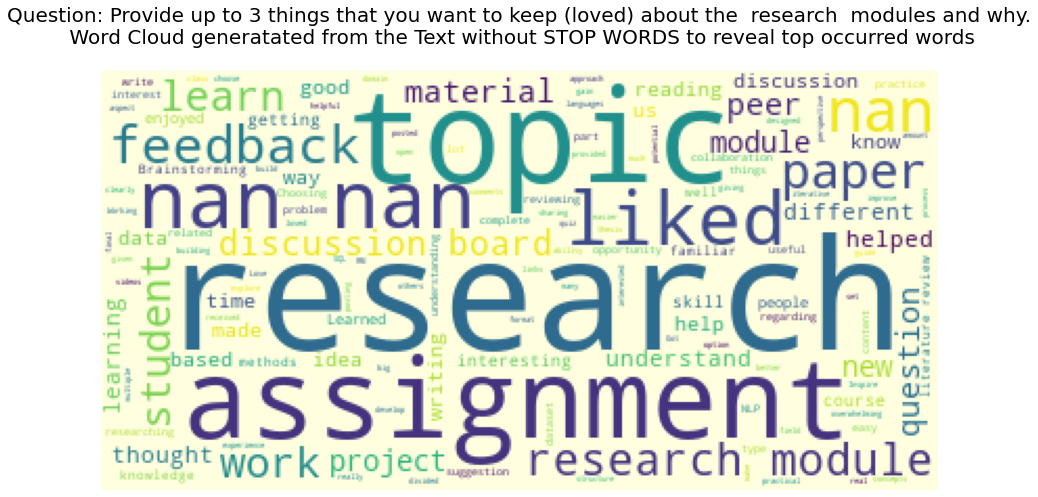

In [21]:
plt.figure(figsize=(15,12))
wc = WordCloud(stopwords=STOPWORDS, background_color='lightyellow').generate(string_col1)
plt.title('Question: Provide up to 3 things that you want to keep (loved) about the  research  modules and why.\
\n Word Cloud generatated from the Text without STOP WORDS to reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wc) #, interpolation="bilinear")
plt.show()

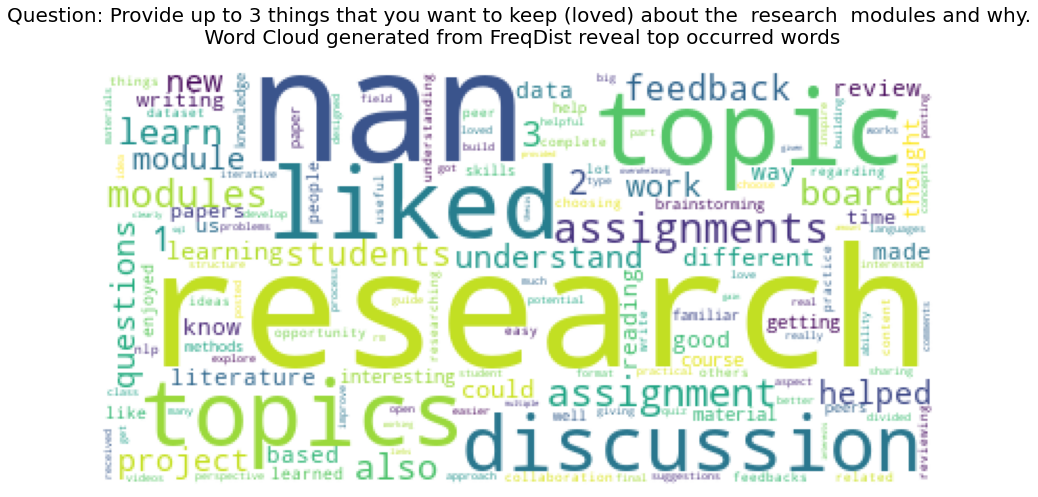

In [22]:
#cloud = WordCloud(width=200/my_dpi,height=150/my_dpi)
plt.figure(figsize=(15,12))
wcf = WordCloud(background_color='white').generate_from_frequencies(freq_dist)
plt.title('Question: Provide up to 3 things that you want to keep (loved) about the  research  modules and why.\
\n Word Cloud generated from FreqDist reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wcf) 
plt.show()

#### Analyze the Answer for question: 'Provide up to 3 things that you disliked about the research modules and why.'

In [23]:
text_col2 = df_text['Provide up to 3 things that you disliked about  the research modules and why.'].values.tolist()
text_col2

["I think the requirement for the implementation of others' feedback without really having enough time to get instructor feedback could be improved by starting the first module earlier, and providing more time for giving and receiving feedback.",
 'I would only want to keep research modules if the labs and weekly research papers were reduced. This contributed far too much work to the overall course load. It was manageable but only barely.',
 nan,
 "I don't have any ",
 "No, I don't any dislike about the research modules.",
 'The research modules are less and mostly are of therotical practice',
 'Because the course was fully online as a result of COVID, there was no scheduled time to discuss topics in a group setting, peer feedback in most cases was limited to very general comments or suggestions.  Would be more helpful for the initial assignment of R1-R3 to be presented as a mini project with each of the modules then broken out.  ',
 nan,
 "Better to experience an actual research. Writ

In [24]:
# Join, tokenize and process the text to data mining the Answers for some context
string_col2 = ' '.join([str(n) for n in text_col2])
tokens2 = word_tokenize(string_col2)
type(tokens2)
# print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens2))
print("First 20 words: \n", tokens2[0:20], "\n")
#Remove punctuations
toker2 = nltk.RegexpTokenizer(r"\w+")
no_punct2 = toker2.tokenize(string_col2)
print("Number of words after punctuation remove: ", len(no_punct2))
print(no_punct2[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist2 = FreqDist(word.lower() for word in no_punct2 if word.lower() not in stopwords.words('english'))
print(freq_dist2, '\n')

#OR 
filtered_words2 = [word.lower() for word in no_punct2 if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words2))
print(filtered_words2[0:20])

Number of words after word tokenizing:  1331
First 20 words: 
 ['I', 'think', 'the', 'requirement', 'for', 'the', 'implementation', 'of', 'others', "'", 'feedback', 'without', 'really', 'having', 'enough', 'time', 'to', 'get', 'instructor', 'feedback'] 

Number of words after punctuation remove:  1224
['I', 'think', 'the', 'requirement', 'for', 'the', 'implementation', 'of', 'others', 'feedback', 'without', 'really', 'having', 'enough', 'time', 'to', 'get', 'instructor', 'feedback', 'could'] 

<FreqDist with 335 samples and 668 outcomes> 

Number of words without stop words:  668
['think', 'requirement', 'implementation', 'others', 'feedback', 'without', 'really', 'enough', 'time', 'get', 'instructor', 'feedback', 'could', 'improved', 'starting', 'first', 'module', 'earlier', 'providing', 'time']


In [25]:
#Calculate Term Frequency for the words in the Student Surveys responses
tf2 = {word: filtered_words2.count(word) for word in set(filtered_words2)}
#list(tf.items())[:20]

freq_dist2.most_common(10)

[('nan', 57),
 ('research', 25),
 ('time', 16),
 ('assignments', 11),
 ('feedback', 9),
 ('course', 9),
 ('like', 9),
 ('modules', 8),
 ('much', 8),
 ('nothing', 8)]

In [26]:
#Lemmatize the cleaned words and count the distinct lemmatized words.
lemma2 = nltk.WordNetLemmatizer()
word_lemmatized2 = [lemma2.lemmatize(t) for t in filtered_words2]
print(FreqDist(word_lemmatized2))

<FreqDist with 316 samples and 668 outcomes>


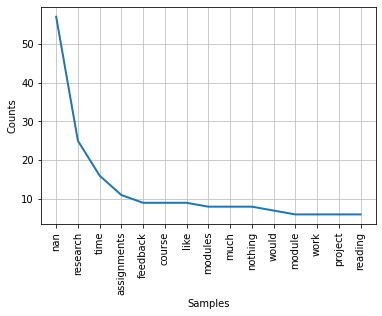

[('nan', 57),
 ('research', 25),
 ('time', 16),
 ('assignments', 11),
 ('feedback', 9),
 ('course', 9),
 ('like', 9),
 ('modules', 8),
 ('much', 8),
 ('nothing', 8),
 ('would', 7),
 ('module', 6),
 ('work', 6),
 ('project', 6),
 ('reading', 6)]

In [27]:
# Calculate the word distribution and plot and list only top 15 words
# The most occurred words reveal the concencus for the question

freq_dist2.plot(15)
freq_dist2.most_common(15)

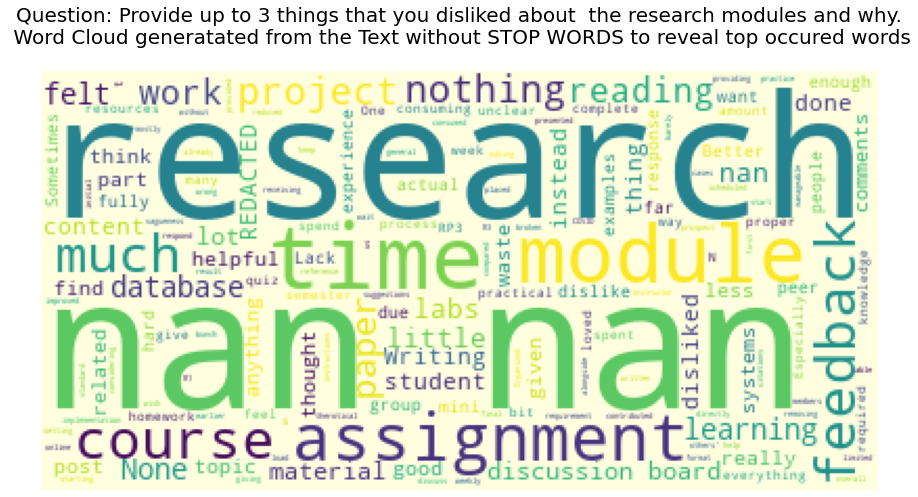

In [28]:
plt.figure(figsize=(15,12))
wc2 = WordCloud(stopwords=STOPWORDS, background_color='lightyellow').generate(string_col2)
plt.title('Question: Provide up to 3 things that you disliked about  the research modules and why.\
\n Word Cloud generatated from the Text without STOP WORDS to reveal top occured words\n', size=20)
plt.axis("off")
plt.imshow(wc2) #, interpolation="bilinear")
plt.show()

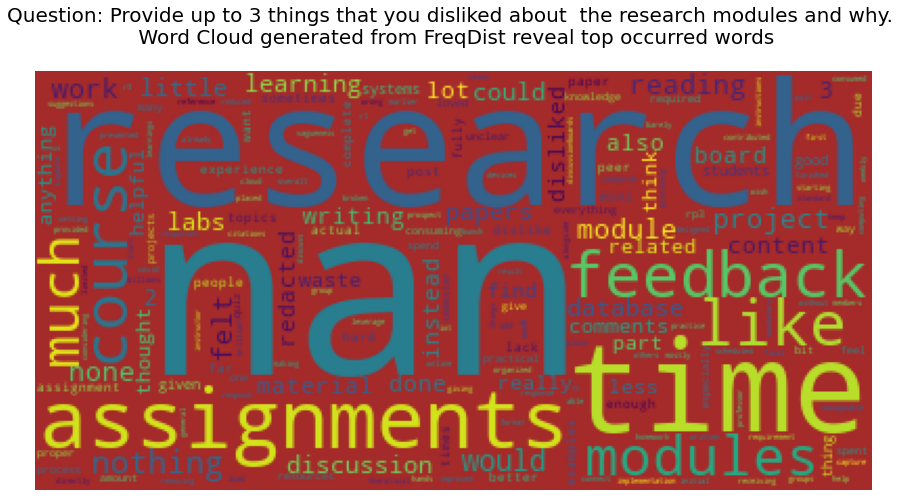

In [29]:
plt.figure(figsize=(15,12))
wcf2 = WordCloud(background_color='brown').generate_from_frequencies(freq_dist2)
plt.title('Question: Provide up to 3 things that you disliked about  the research modules and why. \
\n Word Cloud generated from FreqDist reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wcf2) 
plt.show()

#### Analyze the Answer for question: 'Provide up to 3 things that you suggest to  be  added to the research  modules and why.'

In [30]:
text_col3 = df_text['Provide up to 3 things that you suggest to  be  added to the research  modules and why.'].values.tolist()
print(text_col3)

['It would be nice to have more examples of what was being looked for from the modules.', 'This type of assignment should replace some of the already intensive coursework. It is not something I recommend appending to an existing course without making modifications to the coursework. ', nan, 'This research assignment is good. So, their is no suggestions for it', 'I would suggest add more specific question for writing research modules. For instance, how can you question help the world?', 'The modules can be increased in number which can be more interactive.', 'Make R1-R3 an mini-individual project.  There was confusion in class if these were group assignments or individual ones.  Break the modules into the sections with assigned dates-doing that will help us refine our hypothesis.  ', nan, nan, nan, nan, nan, 'Perhaps directions for optimal brainstorming, such as referring students to a specific library/librarian who will help with the course\nReflection on what the student thought they 

In [31]:
# Join, tokenize and process the text to data mining the Answers for some context
string_col3 = ' '.join([str(n) for n in text_col3])
tokens3 = word_tokenize(string_col3)
type(tokens3)
# print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens3))
print("First 20 words: \n", tokens3[0:20], "\n")
#Remove punctuations
toker3 = nltk.RegexpTokenizer(r"\w+")
no_punct3 = toker3.tokenize(string_col3)
print("Number of words after punctuation remove: ", len(no_punct3))
print(no_punct3[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist3 = FreqDist(word.lower() for word in no_punct3 if word.lower() not in stopwords.words('english'))
print(freq_dist3, '\n')

#OR 
filtered_words3 = [word.lower() for word in no_punct3 if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words3))
print(filtered_words3[0:20])

Number of words after word tokenizing:  1164
First 20 words: 
 ['It', 'would', 'be', 'nice', 'to', 'have', 'more', 'examples', 'of', 'what', 'was', 'being', 'looked', 'for', 'from', 'the', 'modules', '.', 'This', 'type'] 

Number of words after punctuation remove:  1081
['It', 'would', 'be', 'nice', 'to', 'have', 'more', 'examples', 'of', 'what', 'was', 'being', 'looked', 'for', 'from', 'the', 'modules', 'This', 'type', 'of'] 

<FreqDist with 300 samples and 594 outcomes> 

Number of words without stop words:  594
['would', 'nice', 'examples', 'looked', 'modules', 'type', 'assignment', 'replace', 'already', 'intensive', 'coursework', 'something', 'recommend', 'appending', 'existing', 'course', 'without', 'making', 'modifications', 'coursework']


In [32]:
#Lemmatize the cleaned words and count the distinct lemmatized words.
lemma3 = nltk.WordNetLemmatizer()
word_lemmatized3 = [lemma3.lemmatize(t) for t in filtered_words3]
print(FreqDist(word_lemmatized3))

<FreqDist with 284 samples and 594 outcomes>


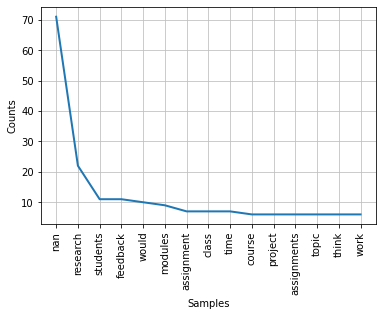

[('nan', 71),
 ('research', 22),
 ('students', 11),
 ('feedback', 11),
 ('would', 10),
 ('modules', 9),
 ('assignment', 7),
 ('class', 7),
 ('time', 7),
 ('course', 6),
 ('project', 6),
 ('assignments', 6),
 ('topic', 6),
 ('think', 6),
 ('work', 6)]

In [33]:
# Calculate the word distribution and plot and list only top 15 words
# The most occurred words reveal the concencus for the question

freq_dist3.plot(15)
freq_dist3.most_common(15)

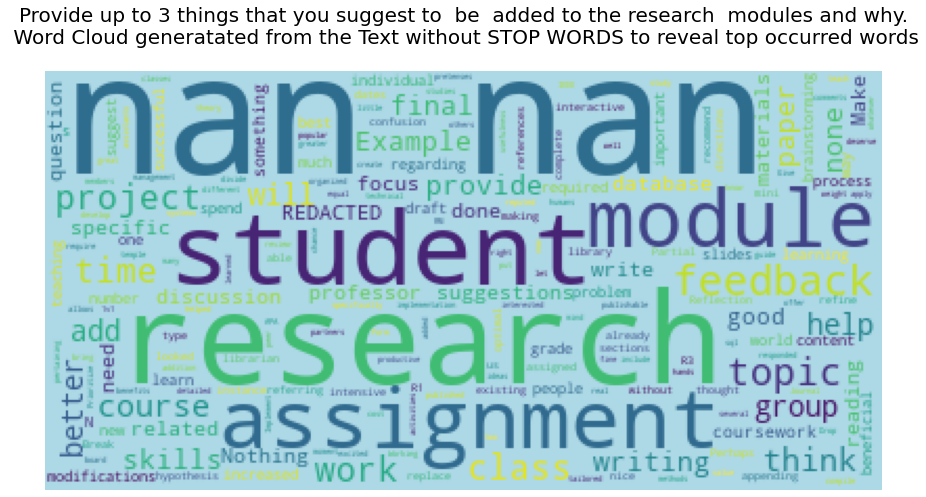

In [34]:
plt.figure(figsize=(15,12))
wc3 = WordCloud(stopwords=STOPWORDS, background_color='lightblue').generate(string_col3)
plt.title('Provide up to 3 things that you suggest to  be  added to the research  modules and why.\
\n Word Cloud generatated from the Text without STOP WORDS to reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wc3) #, interpolation="bilinear")
plt.show()

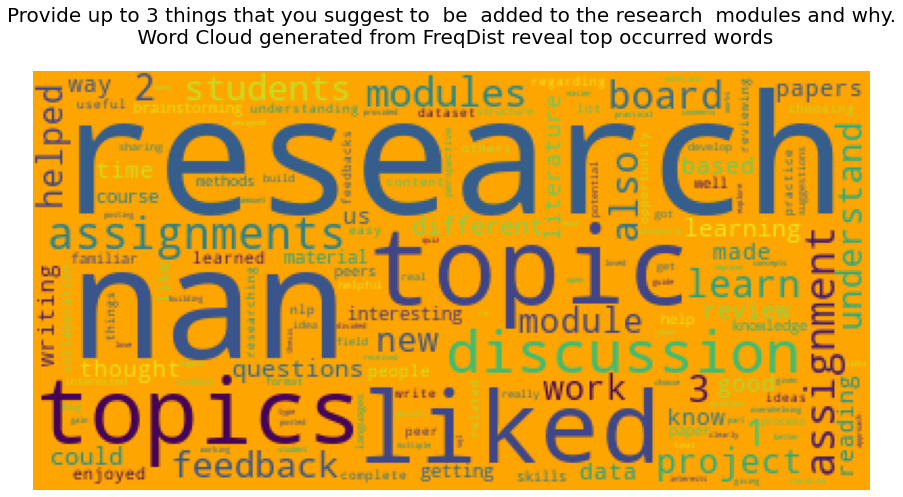

In [35]:
#cloud = WordCloud(width=200/my_dpi,height=150/my_dpi)
plt.figure(figsize=(15,12))
wcf = WordCloud(background_color='orange').generate_from_frequencies(freq_dist)
plt.title('Provide up to 3 things that you suggest to  be  added to the research  modules and why.\
\n Word Cloud generated from FreqDist reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wcf) 
plt.show()

In [36]:
df_text.columns

Index(['Provide up to 3 things that you want to keep (loved) about the  research  modules and why.',
       'Provide up to 3 things that you disliked about  the research modules and why.',
       'Provide up to 3 things that you suggest to  be  added to the research  modules and why.'],
      dtype='object')

## Second approach by using SPACY to get Part of Speech of the Text data and Retrieve only NOUN, VERB, ADJ for analyses

In [37]:
import spacy
# Import SpaCy English model
import en_core_web_sm
from spacy import displacy
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = en_core_web_sm.load()

In [38]:
# Count every named entity
string_col1 = nlp(string_col1)
labels = [x.label_ for x in string_col1.ents]
from collections import Counter
Counter(labels)

Counter({'ORG': 23,
         'GPE': 3,
         'PERSON': 5,
         'WORK_OF_ART': 2,
         'PRODUCT': 1,
         'CARDINAL': 18,
         'NORP': 1})

In [39]:
# Get most frequent tokens
items = [x.text for x in string_col1.ents]
Counter(items).most_common(10)

[('1', 6),
 ('3', 5),
 ('nan nan', 4),
 ('2', 4),
 ('RM', 2),
 ('nan', 2),
 ('SQL', 2),
 ('NLP', 2),
 ('Inspire', 1),
 ('R3', 1)]

In [40]:
# Extract part-of-speech for Noun, Verb, Adjective (NVA)

text_NVA1 = ''
for token in string_col1:
    if token.pos_ == 'NOUN' or token.pos_ == 'VERB' or token.pos_ == 'ADJ':
        text_NVA1 += token.text + ' '
    #print(token)
    
#     print("Word: '" + token.text +"'" , "\t\t\t POS: " + token.pos_) #, " Lemma: " + token.lemma_)
print(text_NVA1)

structure research modules helpful understanding set build research project development module next good mimicking process handled real world liked had do more dive obscure topics learn new technologies perform analysis know other people perspective new idea let other people see thought give suggestion good understand other people thought like way interacted other students sharing thoughts accepting suggestions reading others work offered opportunity identify big data topic interested realized able complete refinement initial hypothesis helpful enjoyed literature review activity helped develop research questions research learning based videos discussions written assignments feedback Brainstorming new ideas thoroughness assignment made students familiar writing research papers liked peer collaboration involved exploring different topics domains potential research Researching new field apply skills learning new languages different platforms detailed understanding idea research modules ex

In [41]:
# Process the new text with only NOUN, VERB, ADJECTIVE
tokens_NVA1 = word_tokenize(text_NVA1)
type(tokens_NVA1)
# print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens_NVA1))
print("First 20 words: \n", tokens_NVA1[0:20], "\n")
#Remove punctuations
toker_NVA1 = nltk.RegexpTokenizer(r"\w+")
no_punct_NVA1 = toker_NVA1.tokenize(text_NVA1)
print("Number of words after punctuation remove: ", len(no_punct_NVA1))
print(no_punct_NVA1[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist_NVA1 = FreqDist(word.lower() for word in no_punct_NVA1 if word.lower() not in stopwords.words('english'))
print(freq_dist_NVA1, '\n')

#OR 
filtered_words_NVA1 = [word.lower() for word in no_punct_NVA1 if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words_NVA1))
print(filtered_words_NVA1[0:20])

Number of words after word tokenizing:  731
First 20 words: 
 ['structure', 'research', 'modules', 'helpful', 'understanding', 'set', 'build', 'research', 'project', 'development', 'module', 'next', 'good', 'mimicking', 'process', 'handled', 'real', 'world', 'liked', 'had'] 

Number of words after punctuation remove:  732
['structure', 'research', 'modules', 'helpful', 'understanding', 'set', 'build', 'research', 'project', 'development', 'module', 'next', 'good', 'mimicking', 'process', 'handled', 'real', 'world', 'liked', 'had'] 

<FreqDist with 325 samples and 706 outcomes> 

Number of words without stop words:  706
['structure', 'research', 'modules', 'helpful', 'understanding', 'set', 'build', 'research', 'project', 'development', 'module', 'next', 'good', 'mimicking', 'process', 'handled', 'real', 'world', 'liked', 'dive']


In [42]:
#Lemmatize the cleaned words and count the distinct lemmatized words.
lemma_NVA1 = nltk.WordNetLemmatizer()
word_lemmatized_NVA1 = [lemma_NVA1.lemmatize(t) for t in filtered_words_NVA1]
print(FreqDist(word_lemmatized_NVA1))

<FreqDist with 300 samples and 706 outcomes>


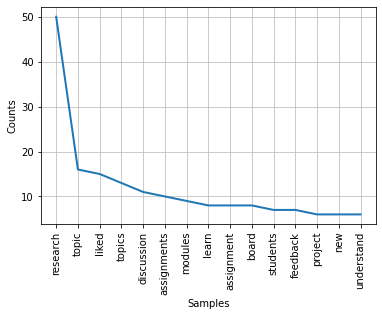

[('research', 50),
 ('topic', 16),
 ('liked', 15),
 ('topics', 13),
 ('discussion', 11),
 ('assignments', 10),
 ('modules', 9),
 ('learn', 8),
 ('assignment', 8),
 ('board', 8),
 ('students', 7),
 ('feedback', 7),
 ('project', 6),
 ('new', 6),
 ('understand', 6)]

In [43]:
# Calculate the word distribution and plot and list only top 15 words
# The most occurred words reveal the concencus for the question: 
#'Provide up to 3 things that you want to keep (loved) about the  research  modules and why.'

freq_dist_NVA1.plot(15)
freq_dist_NVA1.most_common(15)


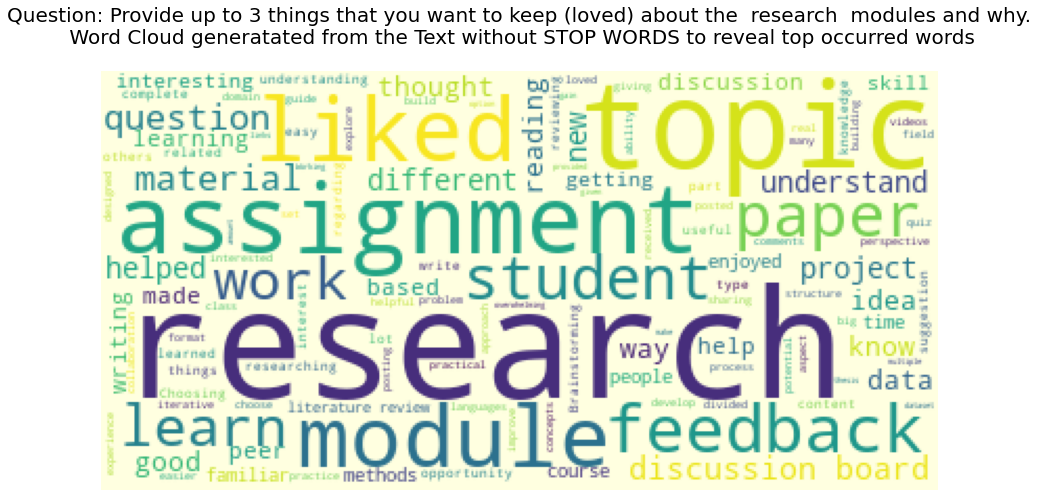

In [44]:
plt.figure(figsize=(15,12))
wc_NVA1 = WordCloud(stopwords=STOPWORDS, background_color='lightyellow').generate(text_NVA1)
plt.title('Question: Provide up to 3 things that you want to keep (loved) about the  research  modules and why.\
\n Word Cloud generatated from the Text without STOP WORDS to reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wc_NVA1) #, interpolation="bilinear")
plt.show()


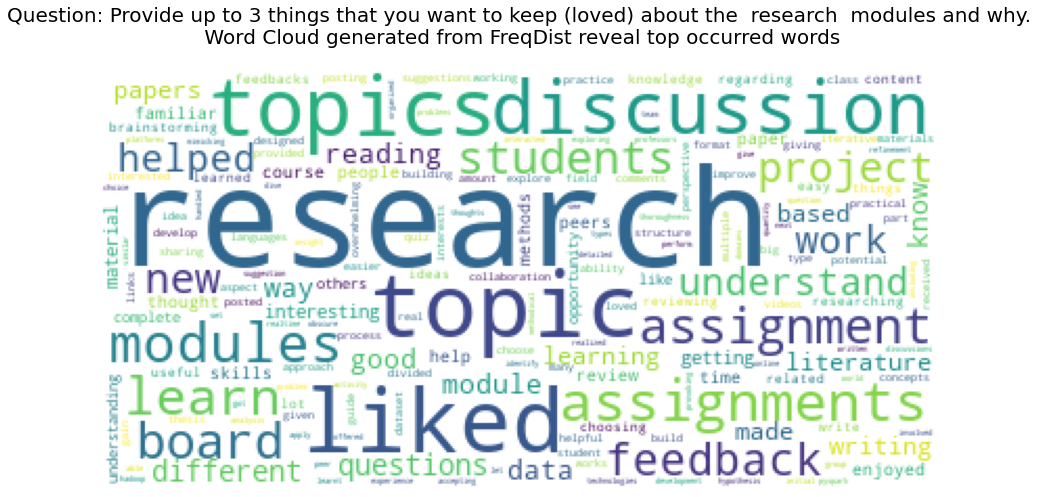

In [45]:
#cloud = WordCloud(width=200/my_dpi,height=150/my_dpi)
plt.figure(figsize=(15,12))
wcf_NVA1 = WordCloud(background_color='white').generate_from_frequencies(freq_dist_NVA1)
plt.title('Question: Provide up to 3 things that you want to keep (loved) about the  research  modules and why.\
\n Word Cloud generated from FreqDist reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wcf_NVA1) 
plt.show()

#### USE SPACY LIBRARY TO ANALYZE TEXT COLUMN 2

In [46]:
# Count every named entity
string_col2 = nlp(string_col2)
labels2 = [x.label_ for x in string_col2.ents]
from collections import Counter
Counter(labels2)

Counter({'DATE': 2, 'ORG': 15, 'PERSON': 2, 'CARDINAL': 10, 'MONEY': 1})

In [47]:

# Get most frequent tokens
items2 = [x.text for x in string_col2.ents]
Counter(items2).most_common(10)

[('1', 4),
 ('2', 2),
 ('nan nan', 2),
 ('weekly', 1),
 ('COVID', 1),
 ('nan Responses', 1),
 ('nan Lack', 1),
 ('nan nan nan nan', 1),
 ('3', 1),
 ('Organized', 1)]

In [48]:
# Extract part-of-speech for Noun, Verb, Adjective (NVA)

text_NVA2 = ''
for token in string_col2:
    if token.pos_ == 'NOUN' or token.pos_ == 'VERB' or token.pos_ == 'ADJ':
        text_NVA2 += token.text + ' '
    #print(token)
    
#     print("Word: '" + token.text +"'" , "\t\t\t POS: " + token.pos_) #, " Lemma: " + token.lemma_)
print(text_NVA2)

think requirement implementation others feedback having enough time get instructor feedback improved starting first module providing more time giving receiving feedback want keep research modules labs weekly research papers reduced contributed much work overall course load manageable have No dislike research modules research modules less therotical practice course online result COVID was scheduled time discuss topics group setting peer feedback most cases limited general comments suggestions helpful initial assignment R3 presented mini project modules broken experience actual research Writing bunch things help Experience reading writing discussion board had wait people post respond removing response part examples little material reference final paper vagueness instructions times such post papers discussion board placed other assignments making hard complete time consumed lot time able find proper citations much homework much loved written part learning prospect compared labs wish resea

In [49]:
# Process the new text with only NOUN, VERB, ADJECTIVE
tokens_NVA2 = word_tokenize(text_NVA2)
type(tokens_NVA2)
# print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens_NVA2))
print("First 20 words: \n", tokens_NVA2[0:20], "\n")
#Remove punctuations
toker_NVA2 = nltk.RegexpTokenizer(r"\w+")
no_punct_NVA2 = toker_NVA1.tokenize(text_NVA2)
print("Number of words after punctuation remove: ", len(no_punct_NVA2))
print(no_punct_NVA2[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist_NVA2 = FreqDist(word.lower() for word in no_punct_NVA2 if word.lower() not in stopwords.words('english'))
print(freq_dist_NVA2, '\n')

#OR 
filtered_words_NVA2 = [word.lower() for word in no_punct_NVA2 if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words_NVA2))
print(filtered_words_NVA2[0:20])

Number of words after word tokenizing:  532
First 20 words: 
 ['think', 'requirement', 'implementation', 'others', 'feedback', 'having', 'enough', 'time', 'get', 'instructor', 'feedback', 'improved', 'starting', 'first', 'module', 'providing', 'more', 'time', 'giving', 'receiving'] 

Number of words after punctuation remove:  532
['think', 'requirement', 'implementation', 'others', 'feedback', 'having', 'enough', 'time', 'get', 'instructor', 'feedback', 'improved', 'starting', 'first', 'module', 'providing', 'more', 'time', 'giving', 'receiving'] 

<FreqDist with 277 samples and 489 outcomes> 

Number of words without stop words:  489
['think', 'requirement', 'implementation', 'others', 'feedback', 'enough', 'time', 'get', 'instructor', 'feedback', 'improved', 'starting', 'first', 'module', 'providing', 'time', 'giving', 'receiving', 'feedback', 'want']


In [50]:
#Lemmatize the cleaned words and count the distinct lemmatized words.
lemma_NVA2 = nltk.WordNetLemmatizer()
word_lemmatized_NVA2 = [lemma_NVA2.lemmatize(t) for t in filtered_words_NVA2]
print(FreqDist(word_lemmatized_NVA2))

<FreqDist with 260 samples and 489 outcomes>


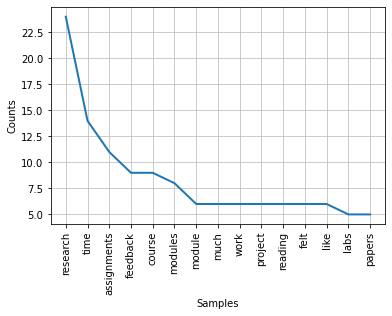

[('research', 24),
 ('time', 14),
 ('assignments', 11),
 ('feedback', 9),
 ('course', 9),
 ('modules', 8),
 ('module', 6),
 ('much', 6),
 ('work', 6),
 ('project', 6),
 ('reading', 6),
 ('felt', 6),
 ('like', 6),
 ('labs', 5),
 ('papers', 5)]

In [51]:
# Calculate the word distribution and plot and list only top 15 words
# The most occurred words reveal the concencus for the question: 
#'Provide up to 3 things that you want to keep (loved) about the  research  modules and why.'

freq_dist_NVA2.plot(15)
freq_dist_NVA2.most_common(15)

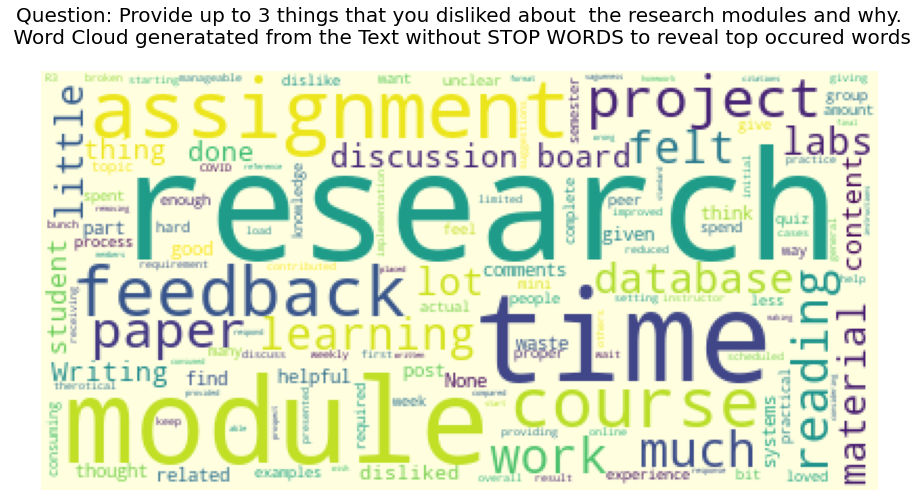

In [52]:
plt.figure(figsize=(15,12))
wc_NVA2 = WordCloud(stopwords=STOPWORDS, background_color='lightyellow').generate(text_NVA2)
plt.title('Question: Provide up to 3 things that you disliked about  the research modules and why.\
\n Word Cloud generatated from the Text without STOP WORDS to reveal top occured words\n', size=20)
plt.axis("off")
plt.imshow(wc_NVA2) #, interpolation="bilinear")
plt.show()

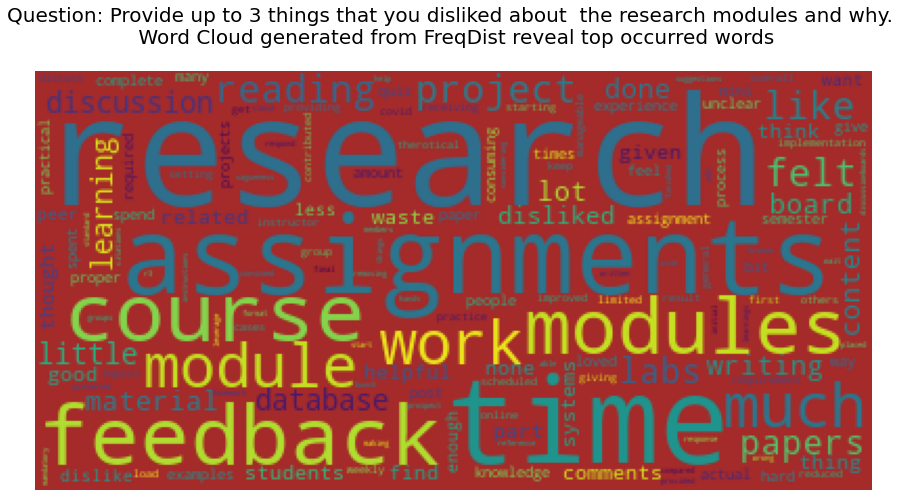

In [53]:
#cloud = WordCloud(width=200/my_dpi,height=150/my_dpi)
plt.figure(figsize=(15,12))
wcf_NVA2 = WordCloud(background_color='brown').generate_from_frequencies(freq_dist_NVA2)
plt.title('Question: Provide up to 3 things that you disliked about  the research modules and why. \
\n Word Cloud generated from FreqDist reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wcf_NVA2) 
plt.show()

#### USING SPACY LIBRARY TO ANALYZE TEXT COLUMN 3

In [54]:
# Count every named entity
string_col3 = nlp(string_col3)
labels3 = [x.label_ for x in string_col3.ents]
from collections import Counter
Counter(labels3)


Counter({'ORG': 21,
         'CARDINAL': 12,
         'GPE': 1,
         'PERSON': 4,
         'LOC': 1,
         'DATE': 2,
         'ORDINAL': 1})

In [55]:
# Get most frequent tokens
items3 = [x.text for x in string_col3.ents]
Counter(items3).most_common(10)


[('nan nan', 7),
 ('2', 4),
 ('1', 4),
 ('3', 3),
 ('writing research modules', 1),
 ('nan nan nan nan nan Perhaps', 1),
 ('nan nan Partial', 1),
 ('nan nan nan nan nan nan nan nan nan nan', 1),
 ('RM', 1),
 ('-0 nan', 1)]

In [56]:
# Extract part-of-speech for Noun, Verb, Adjective (NVA)

text_NVA3 = ''
for token in string_col3:
    if token.pos_ == 'NOUN' or token.pos_ == 'VERB' or token.pos_ == 'ADJ':
        text_NVA3 += token.text + ' '
    #print(token)
    
#     print("Word: '" + token.text +"'" , "\t\t\t POS: " + token.pos_) #, " Lemma: " + token.lemma_)
print(text_NVA3)

nice have more examples looked modules type assignment replace intensive coursework recommend appending existing course making modifications coursework research assignment good suggestions suggest add specific question writing research modules instance question help world modules increased number interactive Make mini - individual project was confusion class group assignments individual ones Break modules sections assigned dates doing help refine hypothesis directions optimal brainstorming such referring students specific library librarian help course student thought done research papers references Needs more suggestions people able write better research brainstorming Partial complete implementation research project done groups members Discussion regarding research topic bring usefulness humans organized none Helped apply learned class real world problem like suggest add more number productive assignments help students more discussion more new research topic comments think modules fine

In [57]:
# Process the new text with only NOUN, VERB, ADJECTIVE
tokens_NVA3 = word_tokenize(text_NVA3)
type(tokens_NVA3)
# print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens_NVA3))
print("First 20 words: \n", tokens_NVA3[0:20], "\n")
#Remove punctuations
toker_NVA3 = nltk.RegexpTokenizer(r"\w+")
no_punct_NVA3 = toker_NVA3.tokenize(text_NVA3)
print("Number of words after punctuation remove: ", len(no_punct_NVA3))
print(no_punct_NVA3[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist_NVA3 = FreqDist(word.lower() for word in no_punct_NVA3 if word.lower() not in stopwords.words('english'))
print(freq_dist_NVA3, '\n')

#OR 
filtered_words_NVA3 = [word.lower() for word in no_punct_NVA3 if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words_NVA3))
print(filtered_words_NVA3[0:20])


Number of words after word tokenizing:  489
First 20 words: 
 ['nice', 'have', 'more', 'examples', 'looked', 'modules', 'type', 'assignment', 'replace', 'intensive', 'coursework', 'recommend', 'appending', 'existing', 'course', 'making', 'modifications', 'coursework', 'research', 'assignment'] 

Number of words after punctuation remove:  487
['nice', 'have', 'more', 'examples', 'looked', 'modules', 'type', 'assignment', 'replace', 'intensive', 'coursework', 'recommend', 'appending', 'existing', 'course', 'making', 'modifications', 'coursework', 'research', 'assignment'] 

<FreqDist with 255 samples and 444 outcomes> 

Number of words without stop words:  444
['nice', 'examples', 'looked', 'modules', 'type', 'assignment', 'replace', 'intensive', 'coursework', 'recommend', 'appending', 'existing', 'course', 'making', 'modifications', 'coursework', 'research', 'assignment', 'good', 'suggestions']


In [58]:
#Lemmatize the cleaned words and count the distinct lemmatized words.
lemma_NVA3 = nltk.WordNetLemmatizer()
word_lemmatized_NVA3 = [lemma_NVA3.lemmatize(t) for t in filtered_words_NVA3]
print(FreqDist(word_lemmatized_NVA3))

<FreqDist with 241 samples and 444 outcomes>


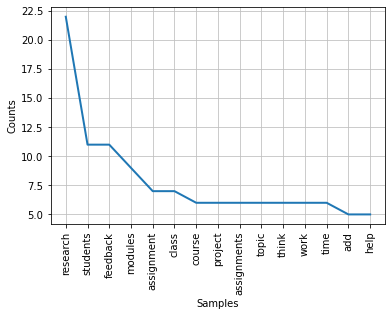

[('research', 22),
 ('students', 11),
 ('feedback', 11),
 ('modules', 9),
 ('assignment', 7),
 ('class', 7),
 ('course', 6),
 ('project', 6),
 ('assignments', 6),
 ('topic', 6),
 ('think', 6),
 ('work', 6),
 ('time', 6),
 ('add', 5),
 ('help', 5)]

In [59]:
# Calculate the word distribution and plot and list only top 15 words
# The most occurred words reveal the concencus for the question: 
#'Provide up to 3 things that you want to keep (loved) about the  research  modules and why.'

freq_dist_NVA3.plot(15)
freq_dist_NVA3.most_common(15)

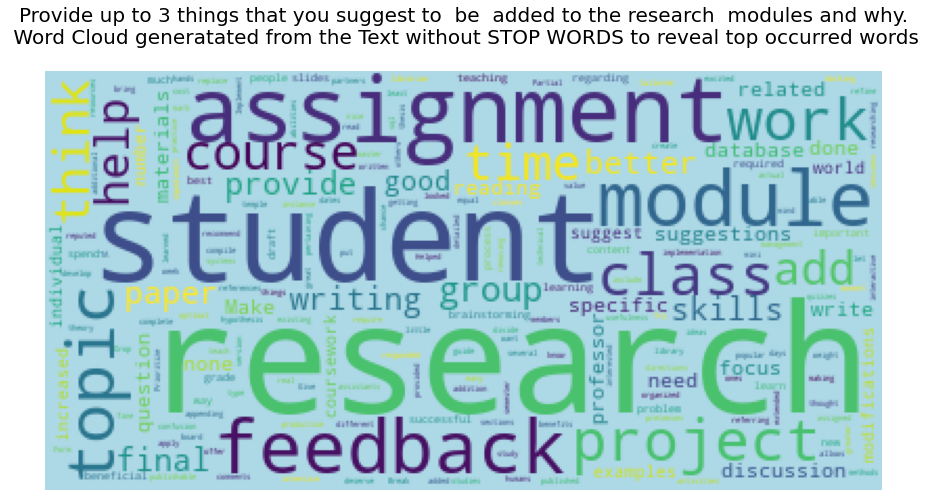

In [60]:
plt.figure(figsize=(15,12))
wc_NVA3 = WordCloud(stopwords=STOPWORDS, background_color='lightblue').generate(text_NVA3)
plt.title('Provide up to 3 things that you suggest to  be  added to the research  modules and why.\
\n Word Cloud generatated from the Text without STOP WORDS to reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wc_NVA3) #, interpolation="bilinear")
plt.show()

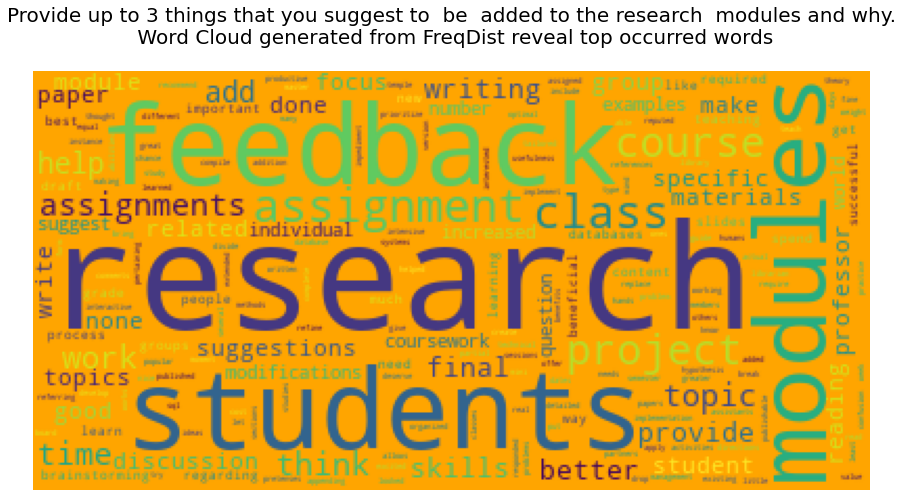

In [61]:
#cloud = WordCloud(width=200/my_dpi,height=150/my_dpi)
plt.figure(figsize=(15,12))
wcf_NVA3 = WordCloud(background_color='orange').generate_from_frequencies(freq_dist_NVA3)
plt.title('Provide up to 3 things that you suggest to  be  added to the research  modules and why.\
\n Word Cloud generated from FreqDist reveal top occurred words\n', size=20)
plt.axis("off")
plt.imshow(wcf_NVA3) 
plt.show()


## REFERENCES:

Custer, C. (2019). 'How to Analyze Survey Data with Python for Beginners.'  Dataquest. Retrieved from https://www.dataquest.io/blog/how-to-analyze-survey-data-python-beginner/

Kumar, S. (2017). 'An Interactive Deep Dive into Survey Results.' Kaggle. Retrieved from https://www.kaggle.com/code/sudalairajkumar/an-interactive-deep-dive-into-survey-results/notebook

Lin, R. (2019). 'How to Analyze SurveyMonkey Data in Python'. Trivago. Retrieved from https://tech.trivago.com/post/2019-09-23-howtoanalyzesurveymonkeydatainpython/

Natarajan, D. (2020). 'How to add percentages on top of bars in seaborn'. Stackoverflow. Retrieved from https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
